In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mltools import plot_data, plot_frontiere, make_grid, gen_arti
from loss import MSELoss,CELoss,BCE
from module import Linear,Sequentiel,Optim,SGD
from fonction_activation import TanH,Sigmoide

(100, 1)
epoch:0,Loss:1.0050
epoch:1000,Loss:0.2611
epoch:2000,Loss:0.0678
epoch:3000,Loss:0.0176
epoch:4000,Loss:0.0046
epoch:5000,Loss:0.0012
epoch:6000,Loss:0.0003
epoch:7000,Loss:0.0001
epoch:8000,Loss:0.0000
epoch:9000,Loss:0.0000


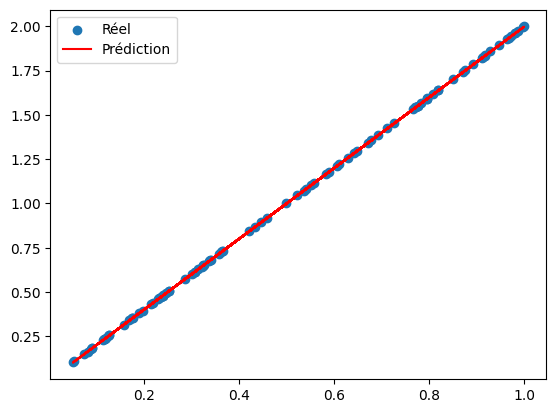

In [2]:
X = np.random.rand(100, 1)
print(X.shape)
y = 2* X

modele=Linear(1,1)
loss=MSELoss()
eps=0.1
epochs=10000
losses=[]

for epoch in range(10000):
  yhat=modele.forward(X)
  #calcule de la loss et du gradient du coût
  loss_value=loss.forward(y,yhat)
  delta=loss.backward(y,yhat)

  #backpropagation:
  modele.zero_grad()
  modele.backward_update_gradient(delta)
  modele.update_parameters(eps)

  if epoch%1000==0 :
    print(f"epoch:{epoch},Loss:{loss_value:.4f}")
  losses.append(loss_value)

plt.scatter(X, y, label='Réel')
plt.plot(X, modele.forward(X), color='red', label='Prédiction')
plt.legend()
plt.show()

In [ ]:
plt.plot(losses)
plt.title("courbe de la perte")

In [ ]:
X = np.random.rand(100, 1)  # (100 exemples, 1 feature)
y = 2 * X + 2 + 0*1 * np.random.randn(100,1)

modele=Linear(1,1,biais=True)
loss=MSELoss()
eps=0.1
epochs=10000
losses=[]

for epoch in range(10000):
  yhat=modele.forward(X)
  #calcule de la loss et du gradient du coût
  loss_value=loss.forward(y,yhat)
  delta=loss.backward(y,yhat)

  #backpropagation:
  modele.zero_grad()
  modele.backward_update_gradient(delta)
  modele.update_parameters(eps)

  if epoch%1000==0 :
    print(f"epoch:{epoch},Loss:{loss_value:.4f}")
  losses.append(loss_value)

plt.scatter(X, y, label='Réel')
plt.plot(X, modele.forward(X), color='red', label='Prédiction')
plt.legend()
plt.show()

In [ ]:
plt.plot(losses)
plt.title("courbe de la perte")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# données
np.random.seed(42)
X = np.random.randn(100, 1)
y = 2 * X + 1 + 0.3 * np.random.randn(100, 1)

# modele
net = Sequentiel(MSELoss(), Linear(1, 1, biais=True))

#descente de gradient
train_loss, test_loss,_,_,= SGD(
    net=net,
    loss=MSELoss(),
    X=X,
    Y=y,
    batch_size=8,
    epochs=200,
    eps=0.01 
)

#plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss', linestyle='--')
plt.xlabel('Epochs'); plt.ylabel('MSE'); plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Vraies données', s=10)
plt.plot(X, net.forward(X), color='red', label='Prédiction')
plt.xlabel('X'); plt.ylabel('y'); plt.legend()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#données
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)  

#donnees
net = Sequentiel(
    MSELoss(),
    Linear(1, 10, biais=True),
    TanH(),
    Linear(10, 1, biais=True)
)

# descente de gradient
train_loss, test_loss,_,_= SGD(
    net=net,
    loss=MSELoss(),
    X=X,
    Y=y,
    batch_size=16,
    epochs=1000,
    eps=0.01 
)

# plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss', linestyle='--')
plt.title("Courbe de loss"); plt.xlabel("Epochs"); plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Données réelles', s=10)
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
plt.plot(x_plot, net.forward(x_plot), color='red', label='Prédiction', linewidth=2)
plt.title("Approximation de sin(X)"); plt.legend()

plt.show()